## Data Understanding

This dataset contains ECG (Electrocardiogram) signal features derived from heartbeats, each labeled as a specific cardiac condition.  
The goal is to build a machine learning model that classifies ECG signals into **Normal**, **Mild Abnormality**, or **Severe Abnormality** categories for early cardiac diagnosis.


In [31]:
# Basic setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', 50)

# Load the ECG dataset
df = pd.read_csv(r"D:\ML_Projects\ECG_Minor\data\ecg_data.csv")

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (4015, 190)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,class,label,label_encoded
0,1.000000,0.940492,0.829237,0.707633,0.423027,0.116429,0.000000,0.012937,0.019405,0.046572,0.060802,0.086675,0.099612,0.108668,0.100906,0.104787,0.087969,0.089263,0.082794,0.080207,0.071151,0.075032,0.068564,0.069858,0.065977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,3
1,1.000000,0.776119,0.417910,0.537313,0.485075,0.529851,0.544776,0.604478,0.537313,0.574627,0.470149,0.470149,0.402985,0.425373,0.343284,0.343284,0.268657,0.313433,0.298507,0.358209,0.350746,0.402985,0.402985,0.477612,0.447761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,3
2,0.985386,0.651357,0.235908,0.225470,0.171190,0.037578,0.006263,0.068894,0.162839,0.240084,0.275574,0.286013,0.298539,0.298539,0.302714,0.313152,0.315240,0.317328,0.311065,0.323591,0.331942,0.327766,0.323591,0.334029,0.344468,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,3
3,1.000000,0.986945,0.569191,0.073107,0.088773,0.357702,0.472585,0.469974,0.480418,0.496084,0.498695,0.493473,0.506527,0.522193,0.527415,0.532637,0.548303,0.553525,0.543081,0.558747,0.574413,0.587467,0.597911,0.624021,0.647520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,3
4,1.000000,0.942708,0.612847,0.243056,0.236111,0.279514,0.248264,0.236111,0.237847,0.236111,0.213542,0.206597,0.197917,0.208333,0.199653,0.201389,0.197917,0.197917,0.185764,0.170139,0.161458,0.164931,0.154514,0.144097,0.140625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,3


#### 1.1 Exploratory Overview

We check datatypes, summary statistics, and class distribution to understand the structure of the ECG dataset.  
This helps identify missing values, imbalance, and any formatting issues before preprocessing.


In [32]:
# Display information about the dataset
df.info()

# Summary statistics
df.describe()

# Count of missing values
df.isnull().sum()

# Distribution of target labels
print("\nLabel distribution:")
print(df['label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Columns: 190 entries, 0 to label_encoded
dtypes: float64(188), int64(1), object(1)
memory usage: 5.8+ MB

Label distribution:
label
Normal                               803
Fusion of paced and normal           803
Premature ventricular contraction    803
Artial Premature                     803
Fusion of ventricular and normal     803
Name: count, dtype: int64


**Observation:**  
We can see the dataset is imbalanced — the 'Normal' class dominates, which can bias the model.  
This imbalance must be corrected before training (using resampling or class weighting).


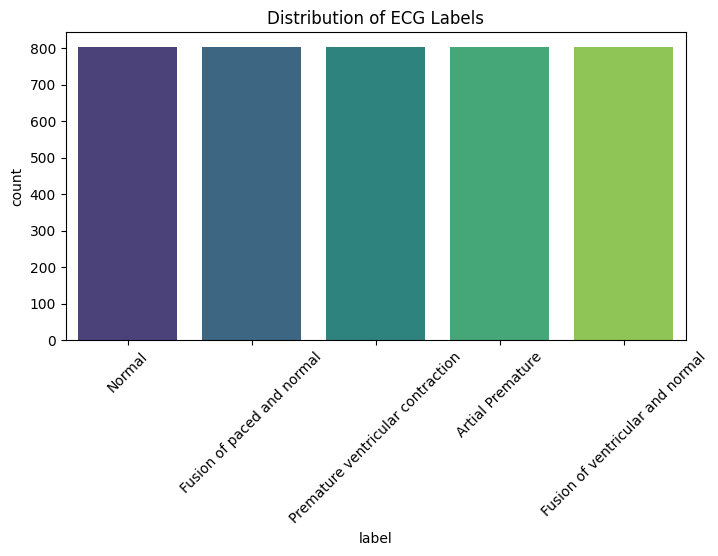

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='label', hue='label', legend=False,
              order=df['label'].value_counts().index, palette="viridis")
plt.title("Distribution of ECG Labels")
plt.xticks(rotation=45)
plt.show()

### 1.2 Feature Relationships
Correlations help us understand which ECG-derived features are related to each other.  
Highly correlated features may carry redundant information.


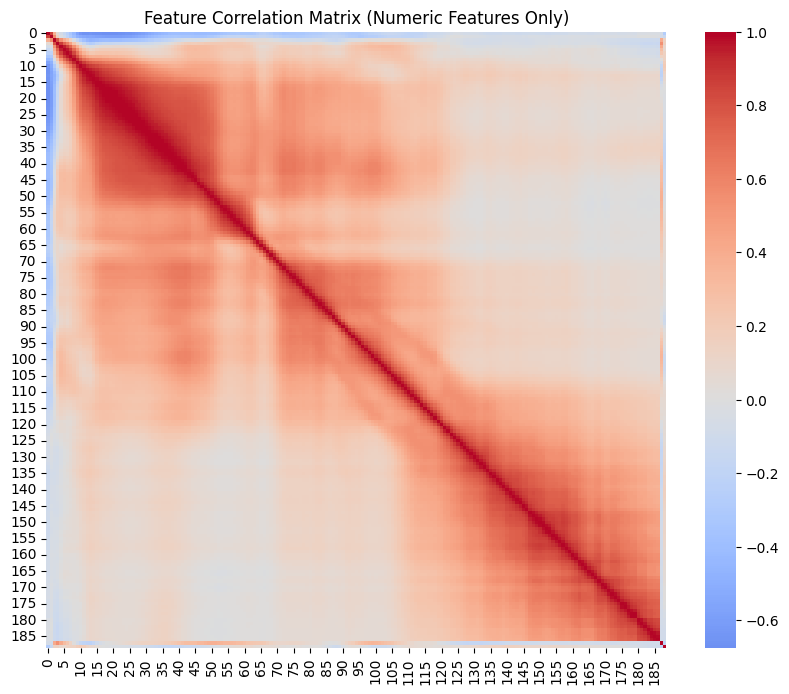

In [34]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix (Numeric Features Only)")
plt.show()



## 2. Data Preprocessing and Balancing
We prepare the ECG dataset for modeling by handling missing values, encoding categorical labels, 
and balancing class distribution to avoid model bias.


In [35]:
# Check again for missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
missing
df = df.fillna(df.median(numeric_only=True))


In [36]:
# Label Encoding
# We’ll convert textual labels (label, maybe class) into numeric codes.

from sklearn.preprocessing import LabelEncoder

if 'label' in df.columns:
    le = LabelEncoder()
    df['label_encoded'] = le.fit_transform(df['label'])
    print("Encoded labels:", dict(zip(le.classes_, le.transform(le.classes_))))
else:
    print("'label' column not found — check column names")

Encoded labels: {'Artial Premature': np.int64(0), 'Fusion of paced and normal': np.int64(1), 'Fusion of ventricular and normal': np.int64(2), 'Normal': np.int64(3), 'Premature ventricular contraction': np.int64(4)}


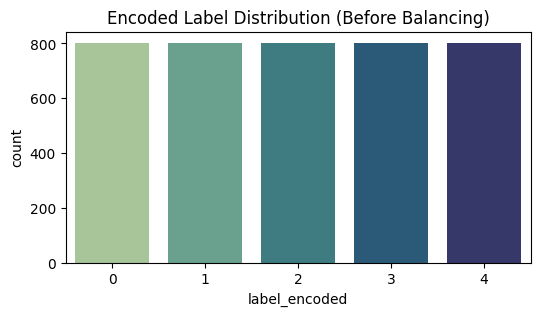

In [37]:
#Check class imbalance

plt.figure(figsize=(6,3))
sns.countplot(x='label_encoded', hue='label_encoded', data=df, legend=False, palette='crest')
plt.title("Encoded Label Distribution (Before Balancing)")
plt.show()

In [38]:
#Balance the Dataset

from sklearn.utils import resample

# Combine features + label for balancing
balanced_df = pd.DataFrame()

# Count each class
class_counts = df['label_encoded'].value_counts()
target_samples = class_counts.min()

for class_id in class_counts.index:
    subset = df[df['label_encoded'] == class_id]
    if len(subset) > target_samples:
        # Downsample majority
        subset = resample(subset, replace=False, n_samples=target_samples, random_state=42)
    else:
        # Upsample minority
        subset = resample(subset, replace=True, n_samples=target_samples, random_state=42)
    balanced_df = pd.concat([balanced_df, subset])

print("New class distribution:\n", balanced_df['label_encoded'].value_counts())

New class distribution:
 label_encoded
3    803
1    803
4    803
0    803
2    803
Name: count, dtype: int64


##### *We resampled *each class* to match the minority class size, ensuring a balanced dataset that prevents bias toward normal signals.*

In [39]:
balanced_df.to_csv(r"D:\ML_Projects\ECG_Minor\data\ecg_data.csv", index=False)
print("✅ Balanced dataset saved successfully.")


✅ Balanced dataset saved successfully.


#### 4.3 Confusion Matrix Interpretation

Each cell shows how many samples from one class were predicted as another.
- Diagonal cells = correct predictions.
- Off-diagonal cells = misclassifications.

This helps identify which ECG categories are harder to distinguish.


In [1]:
import os
os.getcwd()

'C:\\Users\\jatin\\ML_Projects\\ECG_minor'